In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

df = pd.read_csv('datasets/spotify.csv')
pd.set_option('display.max_columns',21)
df.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
88900,88900,4R8BJggjosTswLxtkw8V7P,Jhayco;J Balvin;Bad Bunny,Famouz,No Me Conoce - Remix,82,309120,False,0.806,0.786,10,-3.831,0,0.0741,0.145,0.000000,0.0935,0.580,91.973,4,reggae
25542,25542,4nkGwi71JA1qMPptDPK9gA,The Bar-Kays,Thanksgiving Party,Soul Finger,0,141360,False,0.733,0.467,4,-14.990,1,0.0312,0.148,0.883000,0.3340,0.852,115.871,4,disco
34818,34818,0N690kRoPbKTAnehGM6plV,Kabir Cafe,Panchrang,Mann Lagyo Mero Yaar Fakiri Mein,32,337857,False,0.644,0.824,9,-4.916,1,0.0921,0.115,0.000005,0.1990,0.657,125.455,4,folk
26858,26858,64Eug7tFE4KWJNQUE73BGe,Cheryl Freeman;LaChanze;Vaneese Thomas;Lillias...,Hercules (Original Motion Picture Soundtrack),A Star Is Born,56,124200,False,0.681,0.833,0,-6.248,1,0.0847,0.382,0.000006,0.3910,0.725,117.540,4,disney
55823,55823,1YOW5pnfikVa6BcCBIOQUU,Pritam;Pardeep Singh Sran;Nakash Aziz,"Cutiepie (From ""Ae Dil Hai Mushkil"")","Cutiepie (From ""Ae Dil Hai Mushkil"")",46,231562,False,0.799,0.929,0,-3.231,0,0.0668,0.253,0.000462,0.2400,0.952,127.999,4,indian


In [2]:
#'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo'
#fight_song = [0.499,0.983,-3.662,0.0882,0.000123,0.0378,129.903]

In [3]:
drop_genre = ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'club', 'comedy', 'dance','dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disney', 'drum-and-bass', 'dub', 'dubstep',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'reggae', 'reggaeton', 'rock-n-roll',
       'rockabilly', 'romance', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']


In [4]:
sub_df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','popularity','explicit','duration_ms','time_signature'])
sub_df.drop(sub_df[sub_df['track_genre'].isin(drop_genre)].index,inplace=True)
sub_df = sub_df.reset_index(drop=True)
sub_df.columns , sub_df.shape , sub_df['track_genre'].unique()

(Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'track_genre'],
       dtype='object'),
 (10000, 12),
 array(['classical', 'country', 'disco', 'edm', 'hip-hop', 'jazz', 'metal',
        'pop', 'r-n-b', 'rock'], dtype=object))

In [16]:
X = sub_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = sub_df[['track_genre']]
#'instrumentalness', 'liveness'
y['track_genre'].unique()

array(['classical', 'country', 'disco', 'edm', 'hip-hop', 'jazz', 'metal',
       'pop', 'r-n-b', 'rock'], dtype=object)

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scalar , encoder = StandardScaler(),LabelEncoder()

In [15]:
X = pd.DataFrame(scalar.fit_transform(X),columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])
#fight_song = scalar.fit_transform(np.array([0.499,0.983,-3.662,0.0882,0.000123,0.0378,129.903]).reshape(1,-1))
y = encoder.fit_transform(y)
np.unique_values(y)
#X.describe().round(2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
len(x_train),len(x_test), len(y_train), len(y_test)

(7000, 3000, 7000, 3000)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=19)

In [10]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19)

In [11]:
tree_predictions = classifier.predict(x_test)


In [12]:
print(classification_report(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       306
           1       0.54      0.56      0.55       294
           2       0.51      0.45      0.48       310
           3       0.49      0.56      0.52       280
           4       0.55      0.56      0.55       311
           5       0.71      0.67      0.69       292
           6       0.59      0.57      0.58       321
           7       0.42      0.37      0.39       312
           8       0.46      0.44      0.45       296
           9       0.44      0.48      0.46       278

    accuracy                           0.55      3000
   macro avg       0.55      0.55      0.55      3000
weighted avg       0.55      0.55      0.55      3000



<Axes: >

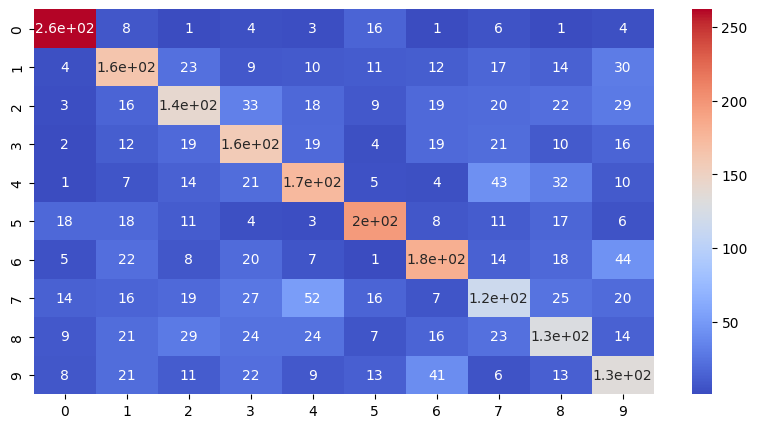

In [13]:
cm = confusion_matrix(y_test,tree_predictions)
plt.figure(figsize=(10,5))
sns.heatmap(cm,cmap='coolwarm',annot=True)

In [14]:
classifier.predict(fight_song)

NameError: name 'fight_song' is not defined

In [ ]:
# from sklearn import tree
# plt.figure(figsize=(10,10))
# tree.plot_tree(classifier,filled=True,fontsize=2)

In [ ]:
# depth = [2,4,5,7,9,10,15,17,19]
# for d in depth:
#     dec_tree = DecisionTreeClassifier(max_depth=d)
#     dec_tree.fit(x_train,y_train)
#     tpred = dec_tree.predict(x_test)
#     print(d,"\n",classification_report(y_test,tpred))

In [ ]:
feat_importances = pd.DataFrame(classifier.feature_importances_, index=X.columns,columns=["Importance"])
feat_importances.sort_values(by='Importance',ascending=False,inplace=True)
feat_importances

,Importance
acousticness,0.220529
danceability,0.143022
loudness,0.130822
valence,0.129575
energy,0.127886
tempo,0.127134
speechiness,0.121032
